# MNIST dataset

##### The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [18]:
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

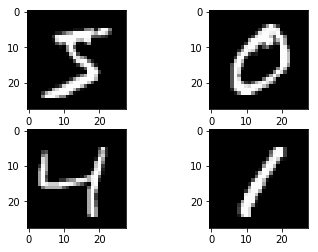

In [4]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [12]:
# https://docs.python.org/2/library/gzip.html
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()


In [13]:
file_content[0:20]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00"

In [14]:
type(file_content)

bytes

In [15]:
int.from_bytes(file_content[0:4], byteorder="big")

2051

In [16]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [19]:
int.from_bytes(file_content[8:12], byteorder='big')

28

In [20]:
int.from_bytes(file_content[12:16], byteorder='big')

28

In [21]:
int.from_bytes(file_content[278:279], byteorder='big')

163

In [22]:
l = file_content[16:800]

In [23]:

type(l)

bytes

In [24]:
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

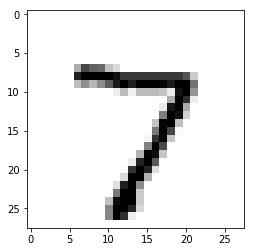

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

In [29]:
image1 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)

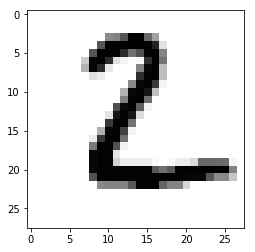

In [30]:
plt.imshow(image1, cmap='gray')